# Data Wrangling and Exploration

The purpose of this chapter is to do some basic data wrangling and exploration of the data set that is used in [Machine Learning for Factor Investing](www.mlfactor.com) (MLFactor), which this section of the book borrows from heavily (in fact, this section of the P4DSF can be viewed as a simplified version of several of the chapters of MLFactor).

Each row of the data set consists of firm/stock characteristics (features) for particular stock on a particular date, and future returns (labels) for that stock.  The columns of the data set can be summarized as follows:

- `stock_id` - the unique identifier of a particular stock
- `date` - the date of an observation
- `firm_characteristics` - 90+ firm/stock characteristics (these will be the features of our returns prediction models)
- `R1M_Usd` - one-month return (numerical label) 
- `R3M_Usd` - three-month return  (numerical label)
- `R6M_Usd` - six-month return (numerical label) 
- `R12M_Usd`- twelve-month return (numerical label)

Later in the chapter we will add the following categorical labels:

- `R1M_Usd_C` - indicates that the one-month return was above the median one-month return (categorical label)
- `R12M_Usd_C` - indicates that the twelve-month return was above the median twelve-month return (categorical label)

Our ultimate objective with this data set is to predict future returns based on firm/stock characteristics.  You can read more about the data set [here](https://www.mlfactor.com/data-description.html).

## Importing Packages

Let's begin by importing some of the packages that we will need.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading In Data

Next, let's read in the raw data.  This data is quite clean already but we will modify it in a few minor ways.

In [ ]:
df_raw = pd.read_csv("../data/data_ml_raw.csv")

## Filtering by Data for 2000-2018

The first bit of cleaning we will do to the raw data is that we will limit ourselves to 2000-2018. Notice that in the code below that the only reason we are transposing `df_ml` is to be able to view all of its columns.

In [ ]:
pd.set_option('display.max_rows', 100)
df_ml = df_raw.query("'1999-12-31' < date & date < '2019-01-01'")
df_ml.T.iloc[:,0:6]

,0,1,2,3,4,5
stock_id,13,13,13,17,17,17
date,2006-12-31,2007-01-31,2007-02-28,2015-03-31,2015-04-30,2015-05-31
Advt_12M_Usd,0.25,0.25,0.26,0.73,0.72,0.71
Advt_3M_Usd,0.33,0.32,0.3,0.64,0.62,0.63
Advt_6M_Usd,0.27,0.28,0.3,0.7,0.66,0.64
Asset_Turnover,0.22,0.22,0.22,0.4,0.4,0.4
Bb_Yld,0.33,0.4,0.15,0.47,0.46,0.47
Bv,0.01,0.01,0.01,0.01,0.01,0.01
Capex_Ps_Cf,0.13,0.13,0.13,0.7,0.7,0.7
Capex_Sales,0.84,0.84,0.84,0.74,0.74,0.74


## The Number of Assets Varies by Date

As we can see in the graph below, the number of assets varies by date.

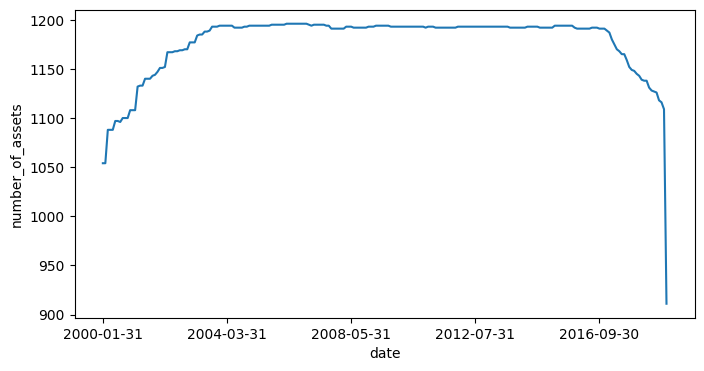

In [ ]:
df_ml.groupby(["date"]).size().plot(ylabel="number_of_assets", figsize=(8,4));

## Uniformized Features

The predictors have been uniformized, that is, for any given feature on any given date, the distribution is uniform [0, 1]. We illustrate this below for 2/29/2000.  Notice that there are 1054 stocks on that date, so the graph below is not a perfect rectangle.

In [ ]:
df_ml.query("date == '2000-02-29'")['stock_id'].nunique()

1054

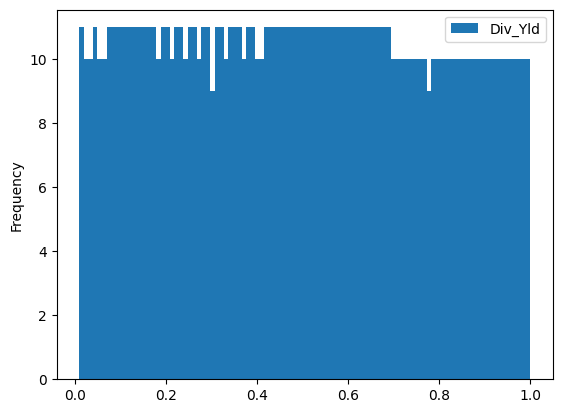

In [ ]:
df_ml.query("date == '2000-02-29'")[["Div_Yld"]].plot(kind="hist", bins=100);

## Creating Categorical Labels

We now create a couple of categorical variables, which indicate whether the forward looking 1-month and 12-month returns are above their cross-sectional median.

In [ ]:
df_median = df_ml[["date","R1M_Usd","R12M_Usd"]].groupby(["date"]).median()
df_median.reset_index(inplace=True)
df_median.rename(columns={"R1M_Usd":"R1M_Usd_median", "R12M_Usd":"R12M_Usd_median"}, inplace=True)
df = pd.merge(df_ml, df_median, how="left", on=["date"])
df["R1M_Usd_C"] = np.where(df["R1M_Usd"] > df["R1M_Usd_median"], 1.0, 0.0)
df["R12M_Usd_C"] = np.where(df["R12M_Usd"] > df["R12M_Usd_median"], 1.0, 0.0)
df.drop(columns=["R1M_Usd_median", "R12M_Usd_median"], inplace=True)
df_ml = df

In [ ]:
df_ml.T.iloc[:,0:6]

,0,1,2,3,4,5
stock_id,13,13,13,17,17,17
date,2006-12-31,2007-01-31,2007-02-28,2015-03-31,2015-04-30,2015-05-31
Advt_12M_Usd,0.25,0.25,0.26,0.73,0.72,0.71
Advt_3M_Usd,0.33,0.32,0.3,0.64,0.62,0.63
Advt_6M_Usd,0.27,0.28,0.3,0.7,0.66,0.64
...,...,...,...,...,...,...
R3M_Usd,0.104,0.091,0.101,-0.144,-0.576,-0.252
R6M_Usd,0.344,-0.011,0.118,-0.518,-0.535,-0.578
R12M_Usd,-0.041,-0.253,-0.366,-0.376,-0.113,-0.194
R1M_Usd_C,1.0,1.0,0.0,1.0,0.0,0.0


## Writing to CSV

Now let's export our data for future use.

In [ ]:
df_ml.to_csv("../data/data_ml.csv", index=False)

## Correlations between Features and Labels

In the figure below, we show a box plot that illustrates the distribution of correlations between features and the one month ahead return. The correlations are computed on a date-by-date basis, over the whole cross-section of stocks. They are mostly located close to zero, but some dates seem to experience extreme values. The market capitalization has the median which is the most negative while volatility is the only predictor with positive median correlation (this particular example seems to refute the low risk anomaly).

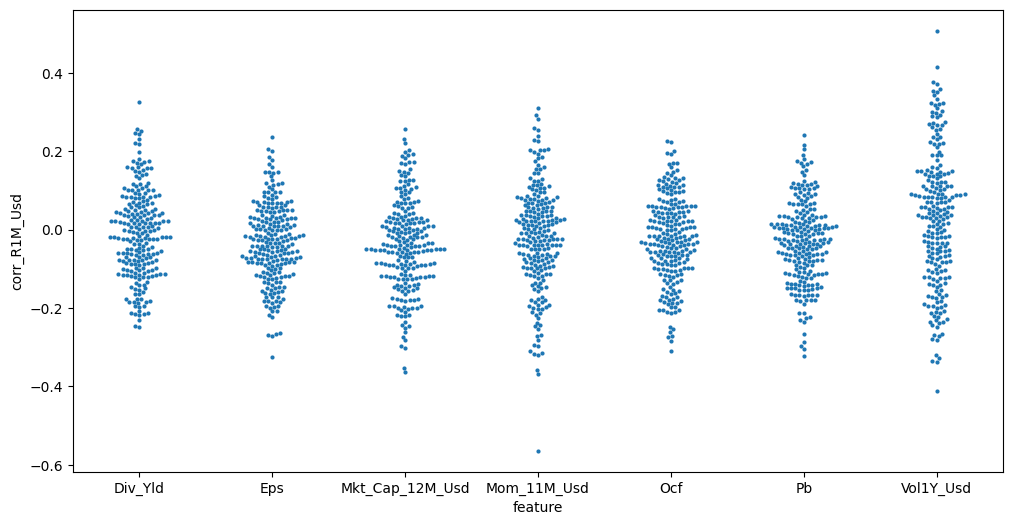

In [ ]:
features_short = [
    "Div_Yld",
    "Eps", 
    "Mkt_Cap_12M_Usd", 
    "Mom_11M_Usd", 
    "Ocf",
    "Pb", 
    "Vol1Y_Usd",
]
cols = features_short+["R1M_Usd","date"]
df_corr = df_ml[cols]
df_corr = \
    (
    df_corr.groupby("date").corr()[["R1M_Usd"]]
        .reset_index()
        .rename(columns={"level_1":"feature", "R1M_Usd":"corr_R1M_Usd"})
    )
df_corr = df_corr.query("feature != 'R1M_Usd'")
plt.figure(figsize=(12,6))              
sns.swarmplot(x="feature", y="corr_R1M_Usd", data=df_corr, size=3); 

## Conditional Average - The Regression Function

The link between the features with the dependent variable can be further characterized by the smoothed conditional average because it shows how the features impact the label. The use of the conditional average has a deep theoretical grounding. Suppose there is only one feature $X$ and that we seek a model  $Y=f(X)+\text{error}$, where variables are real-valued. The function $f$ that minimizes the average squared error $E[(Y−f(X))2]$ is the so-called *regression* function (see Section 2.4 in Hastie, Tibshirani, and Friedman (2009)):

\begin{align*}
f(x)=E[Y|X=x].
\end{align*}

We now plot illustrations of two of these regression functions when the dependent variable ($Y$) is the one month ahead return. The first one is the average market capitalization over the past year(`Mkt_Cap_12M_Usd`) and the second is the volatility over the past year (`Vol1Y_Usd`). Recall that both predictors have been uniformized.  Moreover, the value of the predictors has been rounded to two decimal places - this means that there will be lots of observations with the same values of the predictors, which is important because it will allow us to calculated conditional averages with a `.groupby()`.

Let's begin by using the `pd.melt()` method to pivot the data that we need.

In [ ]:
df_pivoted = pd.melt(df_ml[["R1M_Usd","Mkt_Cap_12M_Usd","Vol1Y_Usd"]], id_vars="R1M_Usd")

Next, we calculated conditional average 1-month returns over values of the features.

In [ ]:
df_conditional_means = \
    (
    df_pivoted
        .groupby(["variable", "value"])[["R1M_Usd"]].mean()
        .reset_index()
    )
df_conditional_means

,variable,value,R1M_Usd
0,Mkt_Cap_12M_Usd,0.01,0.066325
1,Mkt_Cap_12M_Usd,0.02,0.030205
2,Mkt_Cap_12M_Usd,0.03,0.033886
3,Mkt_Cap_12M_Usd,0.04,0.027136
4,Mkt_Cap_12M_Usd,0.05,0.025649
...,...,...,...
195,Vol1Y_Usd,0.96,0.027610
196,Vol1Y_Usd,0.97,0.024338
197,Vol1Y_Usd,0.98,0.028074
198,Vol1Y_Usd,0.99,0.031920


Now we can graph the conditional average returns against the values of the predictors.  As we can see, the two variables have a close to monotonic impact on future returns. Returns, on average, decrease with market capitalization (thereby corroborating the so-called size effect). The reverse pattern is less pronounced for volatility: the curve is rather flat for the first half of volatility scores and progressively increases, especially over the last quintile of volatility values (thereby contradicting the low-volatility anomaly).

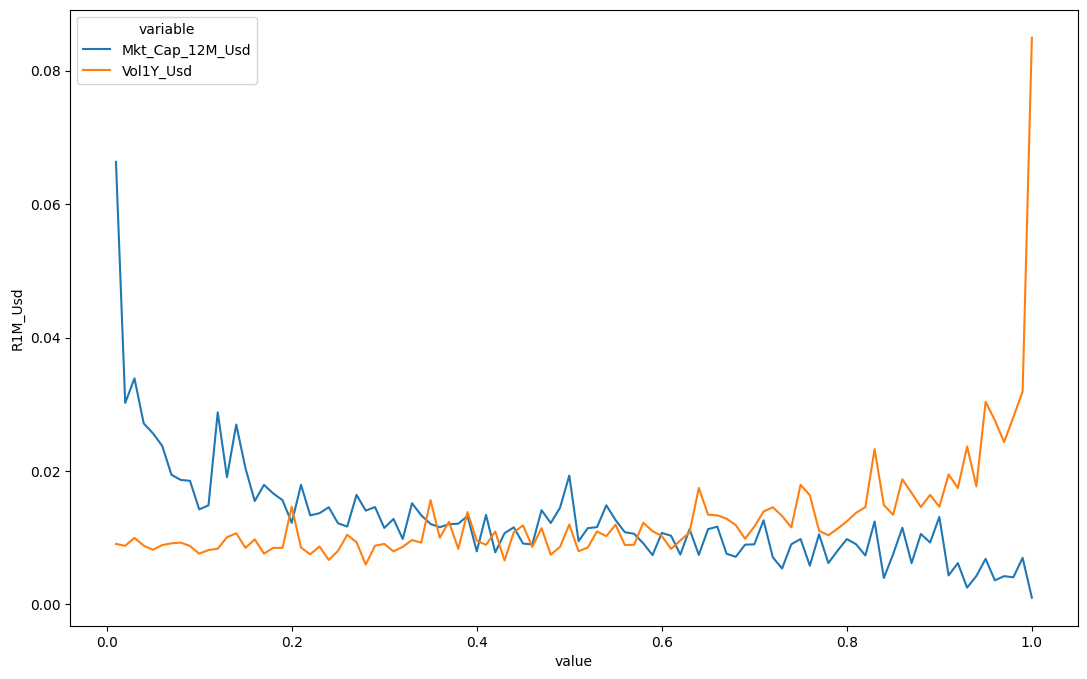

In [ ]:
plt.figure(figsize=(13,8))
sns.lineplot(data = df_conditional_means, y="R1M_Usd", x="value", hue="variable");

Alternatively, we can use the builtin aggregation functionality of `sns.linplot()` to avoid having to use `.groupby()` to calculate the conditional means ourselves.  The added benefit of this approach is that we get the 95% level confidence interval for the computation of the mean. Essentially, it is narrow when both (i) many data points are available and (ii) these points are not too dispersed.

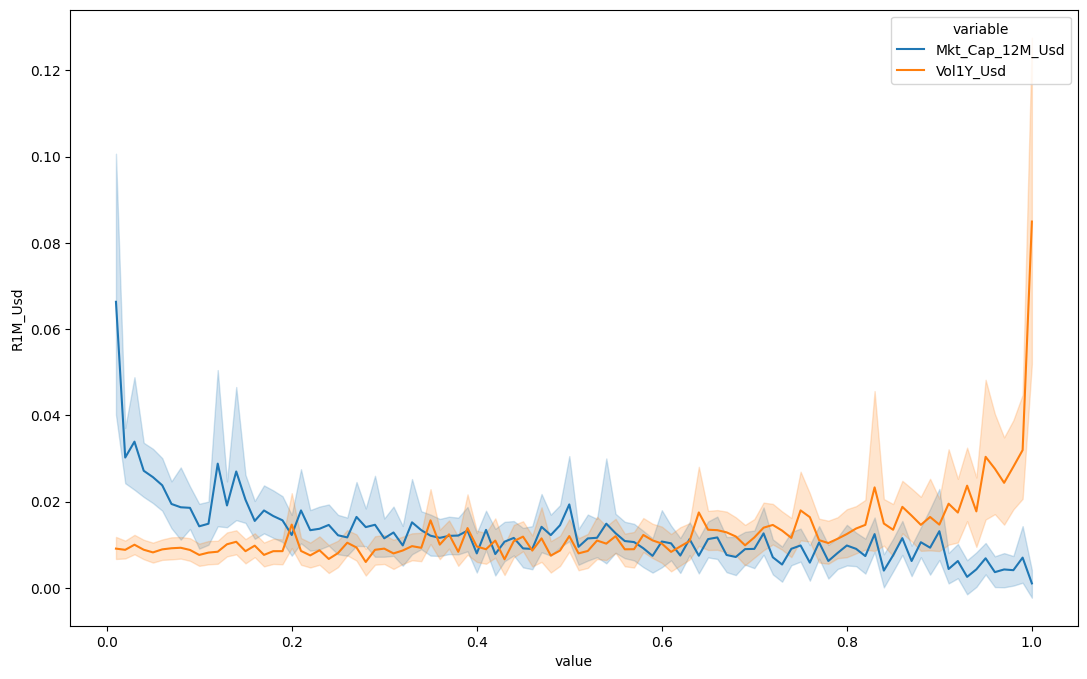

In [ ]:
plt.figure(figsize=(13,8))
sns.lineplot(data = df_pivoted, y="R1M_Usd", x="value", hue="variable");

## OLD CODE

In [ ]:
# features=list(df_ml.iloc[:,3:95].columns) # Keep the feature"s column names (hard-coded, beware!)
# features_short = [
#     "Div_Yld",
#     "Eps", 
#     "Mkt_Cap_12M_Usd", 
#     "Mom_11M_Usd", 
#     "Ocf",
#     "Pb", 
#     "Vol1Y_Usd",
# ]